In [4]:
import sklearn
import numpy as np
import pandas as pd
from numpy import std, mean, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon


In [12]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [13]:
top20 = ["panelb_ca125", 
         "panelb_he4",
         "panelc_ca125_log",
         "panelc_ca125",
         "panelc_he4_log",
         "panela_ca_125",
         "panelc_he4",
         "panelb_ca72_4",
         "panelc_slpi",
         "panela_mif",
         "paneld_ctap",
         "paneld_b2m",
         "panelb_ov_110",
         "panelb_klk6",
         "panelc_spondin2_log",
         "panelb_ca15_3",
         "paneld_hepc",
         "panele_mmp_3",
         "paneld_apo",
         "paneld_tt"]

In [14]:
DATA = pd.read_csv("PLCO.csv")
DATA = DATA[top20+["is_case"]]
DATA = DATA.dropna()

In [15]:
X, Y = DATA.drop(["is_case"], axis=1), DATA["is_case"]

In [16]:
CASE = DATA[DATA["is_case"]==1][top20]
HEALTHY = DATA[DATA["is_case"]==0][top20]

In [17]:
case_panelb_ca125 = CASE["paneld_tt"]
healthy_panelb_ca125 = HEALTHY["paneld_tt"]

In [18]:
cohen_d(case_panelb_ca125, healthy_panelb_ca125)

0.0018347953583825703

In [21]:
def process(feature):
    feature = [v**(-0.215) for v in feature]
    return feature

def scatter_one_feature(feature_name, data):
    feature = data[feature_name]
    
    feature = process(feature)
    
    plt.figure(figsize=(15, 5))
    plt.hist(feature, bins=10)
    plt.xlabel("Instance Number", fontsize=18)
    plt.ylabel("Value", fontsize=18)
    plt.show()

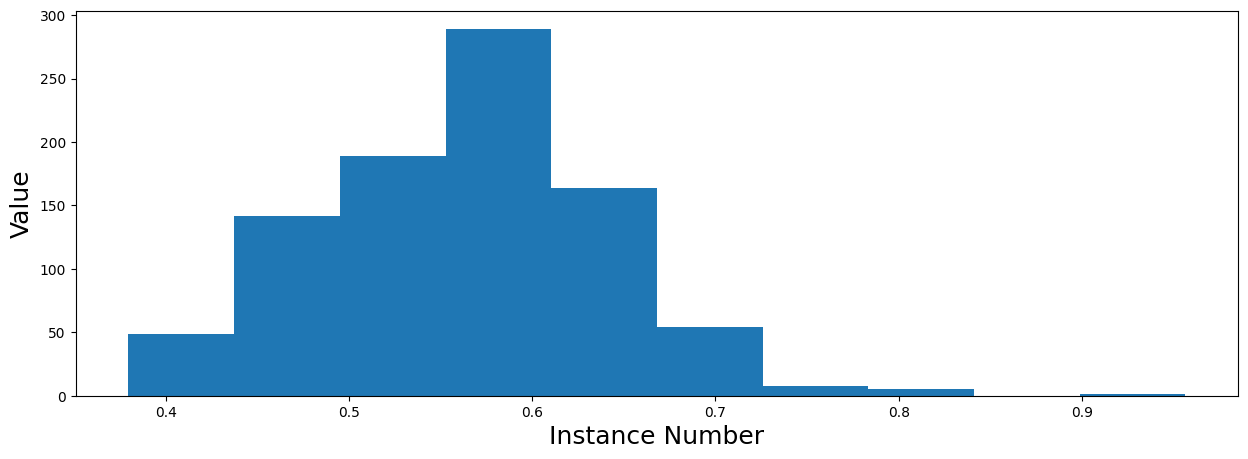

In [22]:
scatter_one_feature("panelb_ca125", HEALTHY)

In [23]:
ttest_ind(case_panelb_ca125, healthy_panelb_ca125)

Ttest_indResult(statistic=0.01838528102241966, pvalue=0.985335118512801)

In [24]:
mannwhitneyu(case_panelb_ca125, healthy_panelb_ca125)

MannwhitneyuResult(statistic=50279.0, pvalue=0.8308120907080443)

In [25]:
top5 = ["panelb_ca125", 
         "panelb_he4",
         "panelc_ca125_log",
         "panelc_ca125",
         "panelc_he4_log"]

bottom5 = ["panelb_ca15_3",
         "paneld_hepc",
         "panele_mmp_3",
         "paneld_apo",
         "paneld_tt"]

In [26]:
values = {}
for f in top5 + bottom5:
    case_measure, healthy_measure = CASE[f], HEALTHY[f]
    values[f] = (mannwhitneyu(case_measure, healthy_measure), cohen_d(case_measure, healthy_measure))

In [27]:
values

{'panelb_ca125': (MannwhitneyuResult(statistic=68726.5, pvalue=1.2610698443825584e-09),
  1.0136157106480843),
 'panelb_he4': (MannwhitneyuResult(statistic=73728.5, pvalue=7.438843451943191e-15),
  1.3068992749062682),
 'panelc_ca125_log': (MannwhitneyuResult(statistic=70504.0, pvalue=2.373108216835132e-11),
  1.3286714095313037),
 'panelc_ca125': (MannwhitneyuResult(statistic=70504.0, pvalue=2.373108216835132e-11),
  0.8451507661421163),
 'panelc_he4_log': (MannwhitneyuResult(statistic=67741.5, pvalue=9.436033123098185e-09),
  1.0268968664583873),
 'panelb_ca15_3': (MannwhitneyuResult(statistic=61554.5, pvalue=0.00028528707354338195),
  0.647712873446164),
 'paneld_hepc': (MannwhitneyuResult(statistic=50504.0, pvalue=0.8910404018079618),
  0.039712894740100424),
 'panele_mmp_3': (MannwhitneyuResult(statistic=47942.0, pvalue=0.3124801800416487),
  -0.02847014441330779),
 'paneld_apo': (MannwhitneyuResult(statistic=49313.0, pvalue=0.5872400398938962),
  -0.012133790049681181),
 'paneld_

In [28]:
p_value_ranks = {}
for col in top20:
    healthy = HEALTHY[col]
    case = CASE[col]
    p_value_ranks[col] = mannwhitneyu(healthy, case).pvalue


In [29]:
p_value_ranks = [k for k, v in sorted(p_value_ranks.items(), key=lambda x: x[1])]

In [30]:
p_value_ranks

['panelb_he4',
 'panela_ca_125',
 'panelc_ca125_log',
 'panelc_ca125',
 'panelb_ca125',
 'panelc_he4_log',
 'panelc_he4',
 'panelb_ca72_4',
 'panelb_klk6',
 'panelb_ca15_3',
 'panelb_ov_110',
 'panela_mif',
 'panelc_spondin2_log',
 'panelc_slpi',
 'panele_mmp_3',
 'paneld_b2m',
 'paneld_apo',
 'paneld_ctap',
 'paneld_tt',
 'paneld_hepc']

In [31]:
shapley_ranks = top20

In [32]:
p_ranks_num = []
for r in shapley_ranks:
    p_ranks_num.append(p_value_ranks.index(r))

In [33]:
p_ranks_num

[4, 0, 2, 3, 5, 1, 6, 7, 13, 11, 17, 15, 10, 8, 12, 9, 19, 14, 16, 18]

In [34]:
wilcoxon_val = wilcoxon(p_ranks_num, range(0, 20))

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [35]:
wilcoxon_val

WilcoxonResult(statistic=67.5, pvalue=0.9793042128380569)

In [36]:
list(range(0, 20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [37]:
wilcoxon([9, 19, 14, 16, 18], range(15, 20))

WilcoxonResult(statistic=3.5, pvalue=0.3125)